In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)

In [4]:
# sample data
normal_sales=np.random.normal(17.4 , 3, 950)
outlier_sales=np.random.normal(80, 20, 50)

sales=np.concatenate([normal_sales, outlier_sales])

In [7]:
def detect_outlier_iqr(data, multiplier=1.5, adaptive=False):
    """
        detection outlier using Iqr method 
        IQR= q3 - q1
        lower_bound = q1-IQR*multiplier
        upper_bound = q3 - IQR * multiplier  
    """
    q1=np.percentile(data, 25)
    q3=np.percentile(data, 75)

    IQR= q3 - q1

    if adaptive:
        skewness=pd.Series(data).skew()  
        if skewness > 1.0:
            multiplier=3.0
        elif skewness <= -1.0:
            multiplier=3.0
    
    lower_bound = q1 - IQR * multiplier
    upper_bound = q3 + IQR * multiplier

    outliers=(data < lower_bound ) | (data > upper_bound)

    return outliers, lower_bound, upper_bound, multiplier
    

In [8]:
outliers, lower_bound, upper_bound, multiplier = detect_outlier_iqr(sales)

In [9]:
outliers

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [10]:
lower_bound

np.float64(9.182196976958528)

In [11]:
upper_bound

np.float64(26.627051608532177)

In [12]:
multiplier

1.5

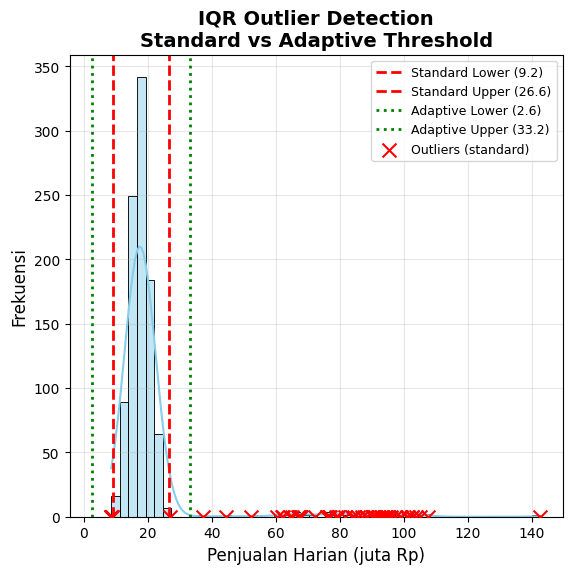

In [14]:
outliers_std, lb_std, ub_std, mult_std = detect_outlier_iqr(sales, multiplier=1.5)
outliers_adap, lb_adap, ub_adap, mult_adap = detect_outlier_iqr(sales, adaptive=True)

# Visualisasi
plt.figure(figsize=(14, 6))

# Plot 1: Histogram dengan batas outlier
plt.subplot(1, 2, 1)
sns.histplot(sales, bins=50, kde=True, color='skyblue', edgecolor='black')
plt.axvline(lb_std, color='red', linestyle='--', linewidth=2, label=f'Standard Lower ({lb_std:.1f})')
plt.axvline(ub_std, color='red', linestyle='--', linewidth=2, label=f'Standard Upper ({ub_std:.1f})')
plt.axvline(lb_adap, color='green', linestyle=':', linewidth=2, label=f'Adaptive Lower ({lb_adap:.1f})')
plt.axvline(ub_adap, color='green', linestyle=':', linewidth=2, label=f'Adaptive Upper ({ub_adap:.1f})')
plt.scatter(sales[outliers_std], [0]*np.sum(outliers_std), 
            c='red', s=100, marker='x', label='Outliers (standard)', zorder=5)
plt.xlabel('Penjualan Harian (juta Rp)', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.title('IQR Outlier Detection\nStandard vs Adaptive Threshold', fontsize=14, fontweight='bold')
plt.legend(fontsize=9)
plt.grid(alpha=0.3)


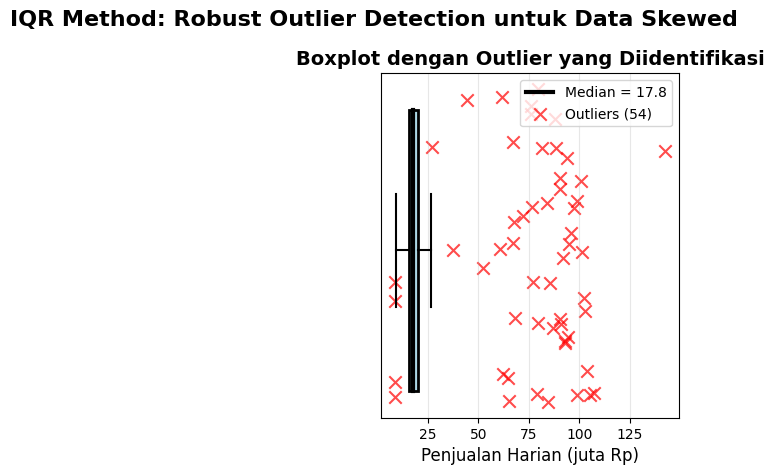

In [15]:
plt.subplot(1, 2, 2)
# Boxplot manual untuk kontrol visualisasi
Q1 = np.percentile(sales, 25)
Q3 = np.percentile(sales, 75)
IQR = Q3 - Q1
median = np.median(sales)

# Gambar box
plt.barh(0, IQR, left=Q1, height=0.5, color='lightblue', edgecolor='black', linewidth=2)
plt.plot([median, median], [-0.25, 0.25], 'k-', linewidth=3, label=f'Median = {median:.1f}')

# Gambar whiskers
lower_whisker = max(np.min(sales), Q1 - 1.5*IQR)
upper_whisker = min(np.max(sales), Q3 + 1.5*IQR)
plt.plot([lower_whisker, Q1], [0, 0], 'k-', linewidth=1.5)
plt.plot([Q3, upper_whisker], [0, 0], 'k-', linewidth=1.5)
plt.plot([lower_whisker, lower_whisker], [-0.1, 0.1], 'k-', linewidth=1.5)
plt.plot([upper_whisker, upper_whisker], [-0.1, 0.1], 'k-', linewidth=1.5)

# Highlight outliers
outlier_points = sales[(sales < lower_whisker) | (sales > upper_whisker)]
plt.scatter(outlier_points, np.random.uniform(-0.3, 0.3, len(outlier_points)), 
            c='red', s=80, marker='x', alpha=0.7, label=f'Outliers ({len(outlier_points)})')

plt.yticks([])
plt.xlabel('Penjualan Harian (juta Rp)', fontsize=12)
plt.title('Boxplot dengan Outlier yang Diidentifikasi', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(axis='x', alpha=0.3)

plt.suptitle('IQR Method: Robust Outlier Detection untuk Data Skewed',
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.savefig('iqr_outlier_detection.png', dpi=150, bbox_inches='tight')
plt.show()

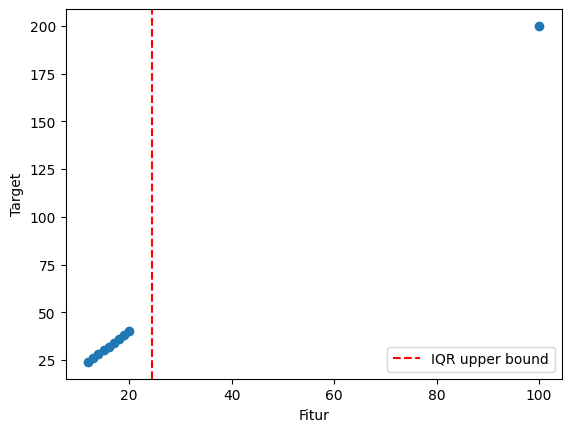

In [16]:
import matplotlib.pyplot as plt

# Data: fitur vs target
fitur = [12,13,14,15,16,17,18,19,20,100]
target = [24,26,28,30,32,34,36,38,40,200]  # Hubungan linear: target ≈ 2*fitur

plt.scatter(fitur, target)
plt.axvline(x=24.5, color='r', linestyle='--', label='IQR upper bound')
plt.xlabel('Fitur'); plt.ylabel('Target'); plt.legend()
plt.show()

In [17]:
import numpy as np
from sklearn.preprocessing import RobustScaler

# Data dengan outlier
X = np.array([[12], [13], [14], [15], [16], [17], [18], [19], [20], [100]])

# Hitung manual untuk pemahaman
median = np.median(X)  # 16.5
q1 = np.percentile(X, 25)  # 14.5
q3 = np.percentile(X, 75)  # 18.5
iqr = q3 - q1  # 4.0

# Robust scaling manual
X_scaled_manual = (X - median) / iqr
# Hasil: [[-1.125], [-0.875], ..., [20.875]] → outlier tetap ekstrem!

# Solusi: Kombinasi Robust Scaling + Clipping
scaler = RobustScaler()
X_robust = scaler.fit_transform(X)  # Skala relatif terhadap median/IQR

# Clipping pada ±3 IQR setelah scaling
X_clipped = np.clip(X_robust, -3, 3)
# Hasil akhir: outlier 100 → dibatasi ke 3.0 (bukan 20.875)

In [20]:
import numpy as np
import torch
import torch.nn as nn

# Data: 9 normal + 1 outlier pada fitur ke-0
X_normal = torch.tensor([[15.0, 10.0]] * 9)  # 9 sampel normal
X_outlier = torch.tensor([[100.0, 10.0]])    # 1 outlier
X = torch.cat([X_normal, X_outlier])
y = torch.tensor([[30.0]] * 10)  # Target konsisten

# Model sederhana
model = nn.Sequential(
    nn.Linear(2, 2),
    nn.ReLU(),
    nn.Linear(2, 1)
)

# Inisialisasi weight manual untuk reproduksibilitas
torch.nn.init.constant_(model[0].weight, 0.5)
torch.nn.init.constant_(model[0].bias, 0.0)

# Hitung gradient untuk outlier vs normal
X_sample_normal = X[0:1]  # Sampel normal
X_sample_outlier = X[9:10]  # Outlier

# Forward + backward untuk sampel normal
loss_normal = nn.MSELoss()(model(X_sample_normal), y[0:1])
loss_normal.backward()
grad_normal = model[0].weight.grad.clone()
model.zero_grad()

# Forward + backward untuk outlier
loss_outlier = nn.MSELoss()(model(X_sample_outlier), y[9:10])
loss_outlier.backward()
grad_outlier = model[0].weight.grad.clone()

print("Gradient dari sampel NORMAL:")
print(grad_normal)
print("\nGradient dari OUTLIER:")
print(grad_outlier)
print(f"\nRasio gradient (outlier/normal): {grad_outlier[0,0].item() / grad_normal[0,0].item():.2f}x")

Gradient dari sampel NORMAL:
tensor([[849.8579, 566.5719],
        [675.3915, 450.2610]])

Gradient dari OUTLIER:
tensor([[11910.3838,  1191.0383],
        [ 9465.3135,   946.5314]])

Rasio gradient (outlier/normal): 14.01x
